https://brunch.co.kr/@cookery/68

https://evan-moon.github.io/2018/07/19/deep-learning-backpropagation/

# 주제 : 단순 선형회귀 (Simple Linear Regression)
---

Tensorflow의 기능을 이용하여, 선형회귀를 구현한다

### 문제 0. 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# warning 꺼주는 작업
import warnings
warnings.filterwarnings(action='ignore')

### 문제 1. 텐서플로우 버전 확인

In [2]:
import tensorflow as tf

print(tf.__version__)

2.8.2


## tape.gradient 설명
https://www.youtube.com/watch?v=pbCeMzN2rcc&ab_channel=Shin%27sLab

In [3]:
test_list1 = np.array([1, 2, 3])
test_list2 = np.array([10, 20, 30])

t1 = tf.Variable(test_list1, dtype=tf.float32)
t2 = tf.Variable(test_list2, dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2

gradients = tape.gradient(t3, [t1, t2])
print(gradients[0])

print(gradients[1])

tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


gradients는 편미분 한다는 뜻임 그러므로 tape.gradient(t3, [t1,t2])는 t3를 t1으로 미분한 값이 0번째 값이고 t3를 t2로 미분한 값이 1번째 값임
* t3 = t1 * t2 이므로 편미분했을 때 상수값만 남게 되고
* t1으로 미분하면 t2, t2로 미분하면 t1이 남음

In [4]:
t4 = t3 + t2

with tf.GradientTape() as tape:
  t3 = t1 * t2
  t4 = t3 + t2

gradients = tape.gradient(t4, [t1,t2,t3])
print(gradients[0])
print(gradients[1])
print(gradients[2])

tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


t4에 대해 t1, t2, t3로 미분하는 것임
* t1, t2로 미분하면 위와 동일한 값이 나오고
* t3로 미분하면 상수값 1이 남음 그래서 gradients[2]가 [1,1,1]로 나옴!

### 문제 2. 데이터 만들기

In [5]:
# 임의 데이터 작성 : [공부 시간, 점수]

data = [[2,81], [4,93], [6, 91], [8, 97]]

### 문제 2. X, y 데이터로 분리

* 종속변수와 독립변수로 분리

In [6]:
# 파이썬의 리스트 내포 

X = [i[0]for i in data]
y = [i[1] for i in data]

X = np.array(X)
y = np.array(y)

In [7]:
X,y

(array([2, 4, 6, 8]), array([81, 93, 91, 97]))

### 문제 3. 시각화

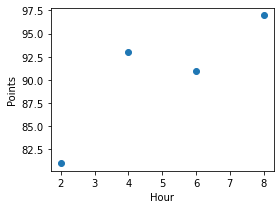

In [8]:
# 데이터의 산점도

plt.figure(figsize=(4,3))
plt.scatter(X, y)
plt.xlabel('Hour')
plt.ylabel('Points')
plt.show()

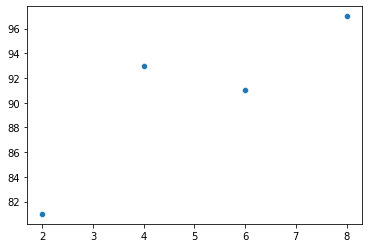

In [9]:
sns.scatterplot(X,y)

### 문제 4. 가설 

* 가설 : $ \hat{y}=Wx +b$

In [10]:
# 임의의 초기값 설정, 변수를 텐서플로우 변수로 정의하는 이유는 자동미분기능(GradientTape)을 사용하기 위함

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * X + b

In [11]:
hypothesis

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 4.5,  8.5, 12.5, 16.5], dtype=float32)>

Tensor에서 numpy array로 변환은 .numpy()함수를 사용합니다

In [12]:
# 초기값 확인
#Tensor에서 numpy array로 변환은 .numpy()함수 사용

W, W.numpy()

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>, 2.0)

#### 가설의 시각화 

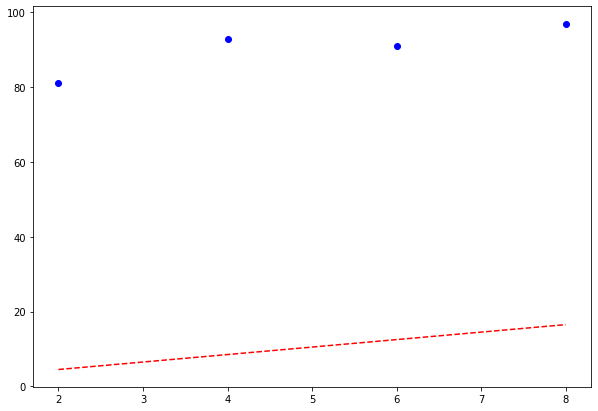

In [14]:
plt.figure(figsize = (10,7))
plt.plot(X, hypothesis.numpy(), 'r--')
# 원래 plot은 선을 그리는 건데 색+o로 하면 (bo, go) 점으로 찍힘
plt.plot(X, y, 'bo')
plt.show()

### 6. 비용 함수 (Cost Function)

$$ \hat{y}=Wx +b$$
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ ({ y-\hat{y}_{ i } })^{ 2 } }  $$

In [15]:
# 현재 손실
cost = tf.reduce_mean(tf.square(hypothesis - y))
cost.numpy()

6408.75

### 7. 학습
#### 자동 미분 기능

* 텐서플로우의 자동미분 기능을 사용

In [ ]:
# 손실함수의 미분값을 계산하세요

with tf.GradientTape() as tape:
  hypothesis = W * X + b
  cost = tf.reduce_mean(tf.square(hypothesis - y))

# tape.gradient는 편미분을 해서 테이프에 기록하겠다는 뜻
# cost를 W로 편미분한 값이 리스트 0번째 값
# cost를 b로 편미분한 값이 리스트 1번째 값
# 이여서 W_grad, b_grad로 구함
W_grad, b_grad = tape.gradient(cost, [W,b])

In [ ]:
# W와 b 계산값을 출력

W_grad.numpy(), b_grad.numpy()

(-803.0, -160.0)

#### 가중치와 기울기 갱신

In [ ]:
learning_rate = 0.01

# assign_sub를 통해 W = W- (learning_rate * W_grad)
# 를 구현함

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.1>

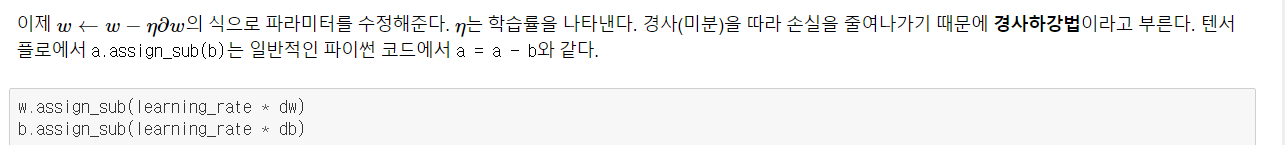

In [ ]:
# W와 b 계산값을 출력하세요

W.numpy(), b.numpy()

(10.03, 2.1)

#### 현재 상태 시각화

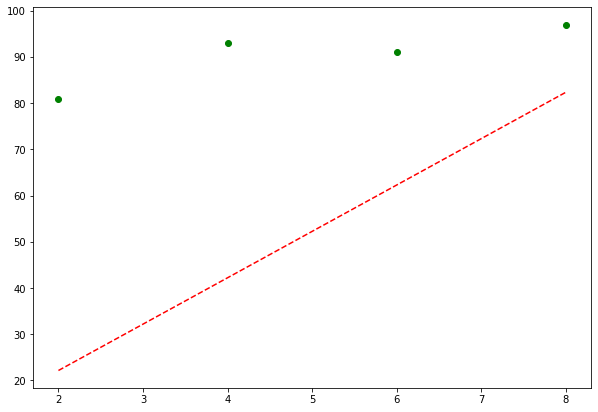

In [ ]:
hypothesis = W*X + b

plt.figure(figsize = (10,7))
plt.plot(X, hypothesis.numpy(), 'r--')
plt.plot(X, y, 'go') # plot은 원래 선으로 그리는데 go 로 하면 점으로 찍힘
plt.show()

### 8. 경사하강법 (Gradient Descent)

In [27]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

learning_rate = 0.01
lr = 0.01
epochs = 2000 # 위의 동작을 2000번 반복

In [28]:
for i in range(epochs+1):
  with tf.GradientTape() as tape:
    hypothesis = W*X + b
    cost = tf.reduce_mean(tf.square(hypothesis-y))

  W_grad, b_grad = tape.gradient(cost, [W, b])
  W.assign_sub(lr*W_grad)
  b.assign_sub(lr*b_grad)
  
  if i%10 == 0:
    print(f"{i:5} | W={W.numpy():.4f} | b={b.numpy():.4f} | cost={cost: .6f}")
  

    0 | W=10.3900 | b=2.0100 | cost= 5710.350098
   10 | W=14.6615 | b=5.2296 | cost= 921.356567
   20 | W=14.2668 | b=7.5873 | cost= 863.929199
   30 | W=13.8844 | b=9.8695 | cost= 810.113647
   40 | W=13.5141 | b=12.0788 | cost= 759.683044
   50 | W=13.1558 | b=14.2175 | cost= 712.424255
   60 | W=12.8088 | b=16.2879 | cost= 668.137756
   70 | W=12.4730 | b=18.2921 | cost= 626.636780
   80 | W=12.1479 | b=20.2322 | cost= 587.746033
   90 | W=11.8331 | b=22.1103 | cost= 551.301331
  100 | W=11.5285 | b=23.9284 | cost= 517.148865
  110 | W=11.2335 | b=25.6884 | cost= 485.144318
  120 | W=10.9480 | b=27.3922 | cost= 455.153015
  130 | W=10.6717 | b=29.0415 | cost= 427.047974
  140 | W=10.4041 | b=30.6381 | cost= 400.710419
  150 | W=10.1451 | b=32.1837 | cost= 376.029510
  160 | W=9.8944 | b=33.6799 | cost= 352.900818
  170 | W=9.6517 | b=35.1282 | cost= 331.226929
  180 | W=9.4167 | b=36.5303 | cost= 310.916260
  190 | W=9.1893 | b=37.8876 | cost= 291.882935
  200 | W=8.9691 | b=39.201

In [30]:
# lr을 너무 작게 하면 학습이 너무 오래 걸림
W = tf.Variable(2.9)
b = tf.Variable(0.5)

lr = 0.001
epochs = 20000 # 위의 동작을 2000번 반복

for i in range(epochs+1):
  with tf.GradientTape() as tape:
    hypothesis = W*X + b
    cost = tf.reduce_mean(tf.square(hypothesis-y))

  W_grad, b_grad = tape.gradient(cost, [W, b])
  W.assign_sub(lr*W_grad)
  b.assign_sub(lr*b_grad)
  
  if i%2000 == 0:
    print(f"{i:5} | W={W.numpy():.4f} | b={b.numpy():.4f} | cost={cost: .6f}")
  

    0 | W=3.6490 | b=0.6510 | cost= 5710.350098
 2000 | W=8.9950 | b=39.0471 | cost= 274.551208
 4000 | W=5.7998 | b=58.1147 | cost= 81.056976
 6000 | W=4.1295 | b=68.0823 | cost= 28.181976
 8000 | W=3.2564 | b=73.2928 | cost= 13.733016
10000 | W=2.7999 | b=76.0166 | cost= 9.784677
12000 | W=2.5614 | b=77.4404 | cost= 8.705734
14000 | W=2.4366 | b=78.1846 | cost= 8.410903
16000 | W=2.3715 | b=78.5736 | cost= 8.330323
18000 | W=2.3374 | b=78.7771 | cost= 8.308301
20000 | W=2.3196 | b=78.8829 | cost= 8.302296


In [31]:
# 그러나 lr을 너무 크게 하면 학습이 정상적으로 이뤄지지 않음
W = tf.Variable(2.9)
b = tf.Variable(0.5)

lr = 0.1
epochs = 2000 # 위의 동작을 2000번 반복

for i in range(epochs+1):
  with tf.GradientTape() as tape:
    hypothesis = W*X + b
    cost = tf.reduce_mean(tf.square(hypothesis-y))

  W_grad, b_grad = tape.gradient(cost, [W, b])
  W.assign_sub(lr*W_grad)
  b.assign_sub(lr*b_grad)
  
  if i%100 == 0:
    print(f"{i:5} | W={W.numpy():.4f} | b={b.numpy():.4f} | cost={cost: .6f}")
  

    0 | W=77.8000 | b=15.6000 | cost= 5710.350098
  100 | W=nan | b=nan | cost= nan
  200 | W=nan | b=nan | cost= nan
  300 | W=nan | b=nan | cost= nan
  400 | W=nan | b=nan | cost= nan
  500 | W=nan | b=nan | cost= nan
  600 | W=nan | b=nan | cost= nan
  700 | W=nan | b=nan | cost= nan
  800 | W=nan | b=nan | cost= nan
  900 | W=nan | b=nan | cost= nan
 1000 | W=nan | b=nan | cost= nan
 1100 | W=nan | b=nan | cost= nan
 1200 | W=nan | b=nan | cost= nan
 1300 | W=nan | b=nan | cost= nan
 1400 | W=nan | b=nan | cost= nan
 1500 | W=nan | b=nan | cost= nan
 1600 | W=nan | b=nan | cost= nan
 1700 | W=nan | b=nan | cost= nan
 1800 | W=nan | b=nan | cost= nan
 1900 | W=nan | b=nan | cost= nan
 2000 | W=nan | b=nan | cost= nan


#### 학습결과 시각화

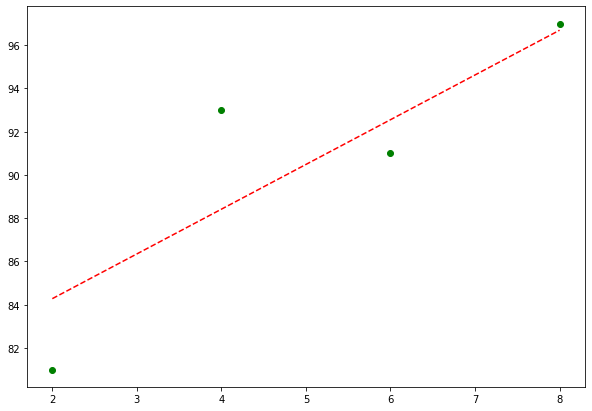

In [ ]:
hypothesis = W*X + b

plt.figure(figsize = (10,7))
plt.plot(X, hypothesis.numpy(), 'r--')
plt.plot(X, y, 'go') # plot은 원래 선으로 그리는데 go 로 하면 점으로 찍힘
plt.show()

### 9. 예측하기

> * 5시간 공부하면 몇점 받을 수 있을까?

In [ ]:
W.numpy(), b.numpy()

(2.069289, 80.1381)

In [ ]:
(5 * W + b).numpy()

90.48454

끝